# Lab 1. Intro a modificaciones de imagenes

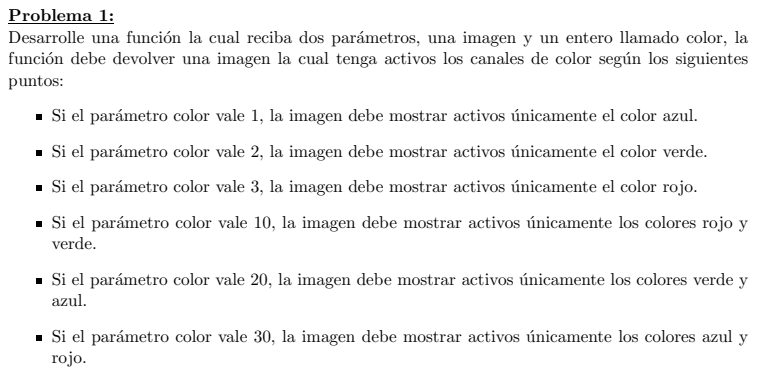

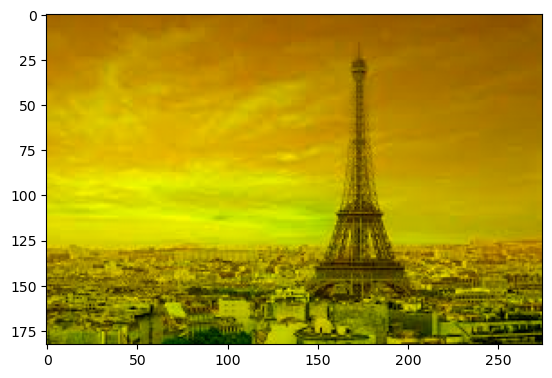

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def mostrar_color(imagen, color=0):


    # Definir los canales de color
    if color == 1:      # azul
        imagen[:, :, 0] = 0 
        imagen[:, :, 1] = 0 

    elif color == 2:    # verde
        imagen[:, :, 0] = 0 
        imagen[:, :, 2] = 0 
    elif color == 3:    # rojo
        imagen[:, :, 1] = 0 
        imagen[:, :, 2] = 0 

    elif color == 10:   # rojo y verde
        imagen[:, :, 2] = 0
    elif color == 20:   # verde y azul
        imagen[:, :, 0] = 0 
    elif color == 30:   # azul y rojo
        imagen[:, :, 1] = 0 

    return plt.imshow(img)


img = cv2.imread('paris.jpg')

mostrar_color(img, 10 )


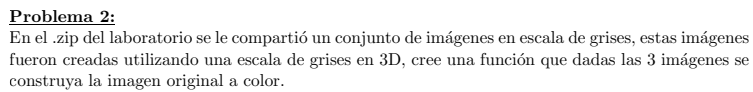

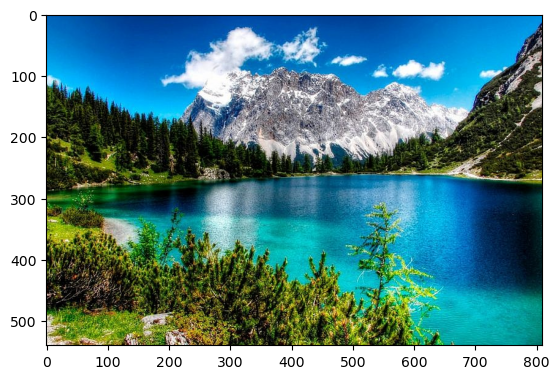

In [13]:
import cv2
import numpy as np

def combinar_imagenes(carpeta):
    # Obtener una lista de todos los archivos en la carpeta
    archivos = sorted(os.listdir(carpeta))

    # Crear un diccionario vacío para almacenar las imágenes en escala de grises
    imagenes_grises = {'_azul': [], '_verde': [], '_rojo': []}

    # Recorrer los archivos de imagen
    for archivo in archivos:
        # Leer la imagen en escala de grises
        imagen_gris = cv2.imread(os.path.join(carpeta, archivo), cv2.IMREAD_GRAYSCALE)

        # Añadir la imagen al canal de color correspondiente en el diccionario
        for color in imagenes_grises:
            if archivo.endswith(color + '.jpg'):
                imagenes_grises[color].append(imagen_gris)




    # Recorrer las listas de imágenes en escala de grises y combinarlas en imágenes a color
    for i in range(len(imagenes_grises['_azul'])):
        imagen_color = cv2.merge((imagenes_grises['_azul'][i], imagenes_grises['_verde'][i], imagenes_grises['_rojo'][i]))
        imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

    return imagen_color


imagenes_color = combinar_imagenes('imagen1')
plt.imshow(imagenes_color)





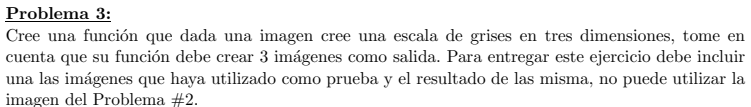

In [14]:
def escala_grises_3D(imagen):

    img = cv2.imread(imagen)
    canales = cv2.split(img)

    colores = ['azul', 'verde', 'rojo']
    for i, canal in enumerate(canales):
        cv2.imwrite(f'problema3_imagen/problema_3_{os.path.splitext(imagen)[0]}_{colores[i]}.jpg', canal)


escala_grises_3D('paris.jpg')


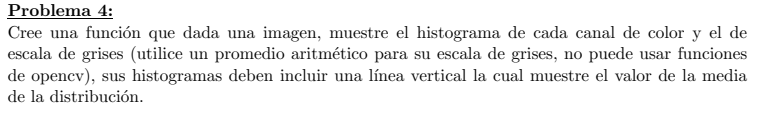

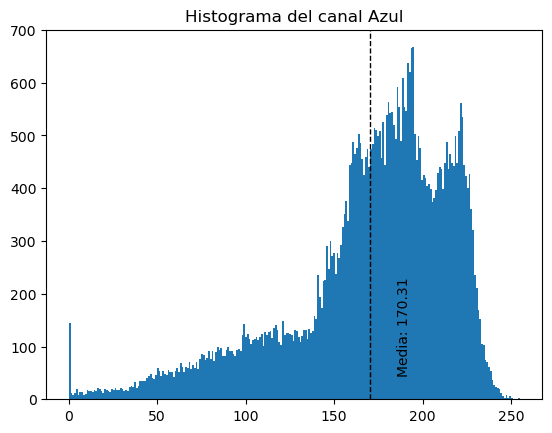

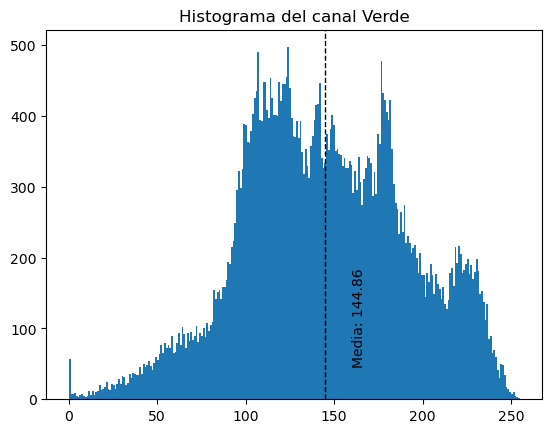

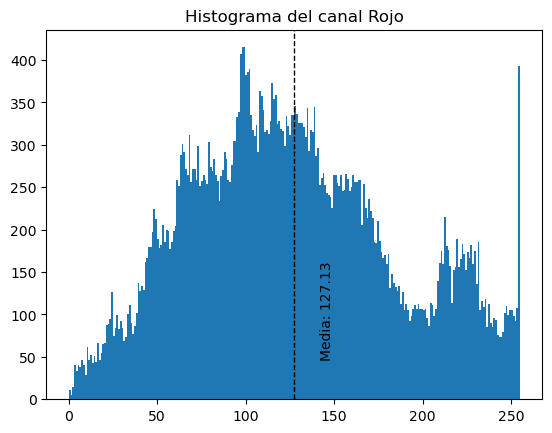

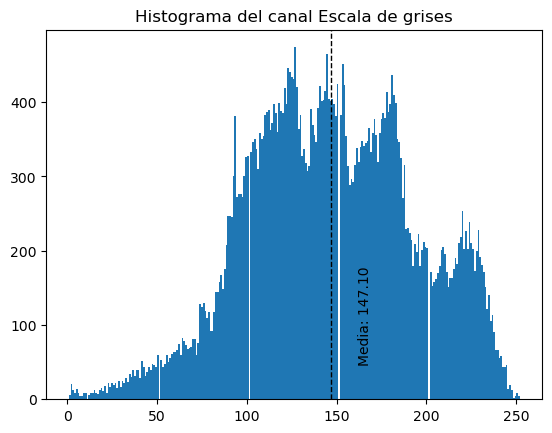

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histograma(image_path):
    # Cargar la imagen
    img = cv2.imread(image_path)

    h, w = img.shape[:2]
    monocrom_gray = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            pixel = img[i, j]

            R = pixel[2]
            G = pixel[1]
            B = pixel[0]
            monocrom_gray[i,j] = int(np.sum([R, G, B]) / 3) # media de los colores

    # Separar los canales de color
    B, G, R = cv2.split(img)

    # Para cada canal y la imagen en grayscale, calcular y mostrar histograma y media
    for i, (channel, color) in enumerate(zip((B,G,R,monocrom_gray), ("Azul", "Verde", "Rojo", "Escala de grises"))):
        plt.figure(i)
        plt.title(f'Histograma del canal {color}')
        plt.hist(channel.ravel(), bins=256)
        mean_val = np.mean(channel)
        plt.axvline(mean_val, color='k', linestyle='dashed', linewidth=1)
        plt.text(mean_val+15, 50, f'Media: {mean_val:.2f}', rotation=90)
        plt.show()

# Uso de la función con una imagen de ejemplo
histograma('paris.jpg')


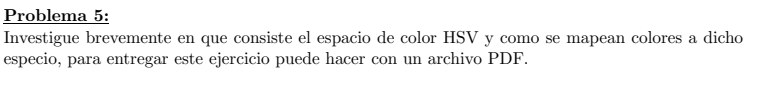

HSV es un espacio de color que se define por tres componentes:

Hue (Matiz)
Saturation (Saturación)
Value (Valor)
1. Hue (Matiz): Representa el color en sí. En términos más técnicos, el matiz se refiere a la longitud de onda dominante que entra en el ojo. En un círculo de colores (a menudo usado para visualizar el componente de matiz en HSV), los matices se organizan en un espectro de colores que se despliega en un círculo completo de 360 grados. Los valores de matiz se mapean a estos grados: rojo en 0 (y 360), verde en 120 y azul en 240.

2. Saturation (Saturación): Es la medida de la pureza o intensidad del color, o de cuánto blanco se mezcla con el color. Cuanto más blanco se mezcla con un color, más "lavado" o "desaturado" se vuelve. En un valor de saturación de 0, no queda color y sólo se ve el blanco. En un valor de saturación de 100, el color está en su máxima intensidad.

3. Value (Valor): También conocido como "brightness" (brillo), es la medida de cuánto negro se mezcla con el color. Cuanto más negro se mezcla con un color, más oscuro se vuelve. En un valor de 0, no queda color y sólo se ve el negro. En un valor de 100, no se mezcla ningún negro y el color está en su máxima luminosidad.

El espacio de color HSV es especialmente útil en aplicaciones de gráficos y visualización de imágenes donde es importante el ajuste del color, la saturación y el brillo.

Las transformaciones de color son muy fáciles en este espacio, por ejemplo, oscurecer un color sólo requiere reducir su valor, y saturar o desaturar un color sólo requiere aumentar o disminuir su saturación.